In [1]:
import numpy as np
from scipy.stats import truncexpon, uniform
import matplotlib.pyplot as plt

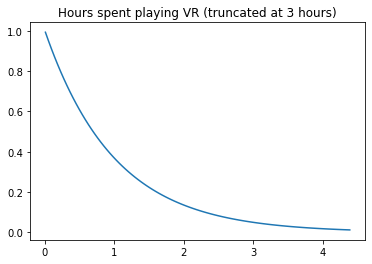

In [2]:
# For this analysis, we consider that everyone plays VR less than 6 hours (extending this to higher number doesn't actually change the numbers very much)
MAX_HOUR = 6
vr = truncexpon(b=MAX_HOUR)
hours_played = np.linspace(vr.ppf(0.01),
                           vr.ppf(0.99), 100)
plt.plot(hours_played, vr.pdf(hours_played)); plt.title("Hours spent playing VR (truncated at 3 hours)");

In [3]:
# 0-1 hours played
light_play_ratio = vr.cdf(1)
light_play_ratio

0.6336913225737218

In [4]:
# 1-2 hours watched
moderate_play_ratio = vr.cdf(2) - vr.cdf(1)
moderate_play_ratio

0.23312200962361307

In [5]:
# 2-3 hours watched
heavy_play_ratio = vr.cdf(3) - vr.cdf(2)
heavy_play_ratio

0.08576079462509834

In [6]:
START_TIME = 0
END_TIME = 24

class Player():
    def __init__(self, hours):
        self.start = uniform(loc=START_TIME, scale=END_TIME - START_TIME).rvs()
        self.end = self.start + hours
        self.hours = hours
        
# e.g. 2.5 hours player
player = Player(2.5)
print(player.start, player.end, player.hours)

8.587831187629286 11.087831187629286 2.5


In [7]:
TOTAL_NUM = 50000

players = np.full((TOTAL_NUM,), Player(0))
for n in np.arange(TOTAL_NUM):
    players[n] = Player(vr.rvs())

In [8]:
def active(player, select_start, select_end):
    # checks whether player is active during selection window
    return (player.start < select_end and        # player starts playing before selection window ends and 
            select_start < player.end)           # player stops playing after selection window starts

In [9]:
def analyze(players, select_start, select_end):
    active_mask = np.vectorize(lambda player : active(player, select_start, select_end))(players)
    print(f"Ratio of players active from {select_start} to {select_end}: ", active_mask.mean())
    active_players = players[active_mask]
    light = np.vectorize(lambda player : player.hours < 1)(active_players)
    print("Of these, ")
    print("% light user: ", round(light.mean(), 3))
    moderate = np.vectorize(lambda player : player.hours > 1 and player.hours < 2)(active_players)
    print("% moderate user: ", round(moderate.mean(), 3))
    heavy = np.vectorize(lambda player : player.hours > 2 and player.hours < 3)(active_players)
    print("% heavy user: ", round(heavy.mean(), 3), "\n")


analyze(players, 10, 11)
analyze(players, 11, 12)
analyze(players, 12, 13)
analyze(players, 13, 14)

Ratio of players active from 10 to 11:  0.08182
Of these, 
% light user:  0.451
% moderate user:  0.283
% heavy user:  0.149 

Ratio of players active from 11 to 12:  0.08366
Of these, 
% light user:  0.464
% moderate user:  0.275
% heavy user:  0.145 

Ratio of players active from 12 to 13:  0.08288
Of these, 
% light user:  0.451
% moderate user:  0.274
% heavy user:  0.155 

Ratio of players active from 13 to 14:  0.08344
Of these, 
% light user:  0.44
% moderate user:  0.287
% heavy user:  0.158 



In [10]:
analyze(players, 10, 12)
analyze(players, 11, 13)
analyze(players, 12, 14)

Ratio of players active from 10 to 12:  0.12452
Of these, 
% light user:  0.517
% moderate user:  0.262
% heavy user:  0.126 

Ratio of players active from 11 to 13:  0.12542
Of these, 
% light user:  0.517
% moderate user:  0.259
% heavy user:  0.13 

Ratio of players active from 12 to 14:  0.1248
Of these, 
% light user:  0.509
% moderate user:  0.266
% heavy user:  0.133 



In [11]:
analyze(players, 10, 13)
analyze(players, 11, 14)

Ratio of players active from 10 to 13:  0.16628
Of these, 
% light user:  0.544
% moderate user:  0.254
% heavy user:  0.12 

Ratio of players active from 11 to 14:  0.16734
Of these, 
% light user:  0.544
% moderate user:  0.257
% heavy user:  0.12 

